---
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Investigación Operativa I4051__\
__Autor: Rodrigo Maranzana__, Rmaranzana@frba.utn.edu.ar

---

# Ejercicio introductorio AGV en centro de distribución

En un centro de distribución de una e-commerce se quiere modelizar con una cadena de Markov el trabajo de un AGV.

Se recogen datos de la máquina cada un instante de tiempo de 40 segundos.

- Si en un instante está cargando o descargando mercadería, hay una probabilidad del 75% que en el próximo instante esté en viaje.
- Si está en viaje, hay una probabilidad del 30% que descargue o cargue en el próximo instante.

A) Si ahora está en tránsito, ¿Cuál es la probabilidad que en 3 instantes de tiempo esté cargando o descargando?

B) ¿Cuál es el estado estable?

## Datos Iniciales

Importamos las librerías necesarias.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

Ingresamos los datos de la matriz de transición en una matriz numpy:

In [ ]:
## Matriz de transición como numpy array:
T = np.array([[0.10, 0.90],
              [0.75, 0.25]])

# Printeamos T
print(f'Matriz de transición: \n{T}')

## Ejercicio A

En primer lugar, calculamos la matriz de transición habiendo pasado 3 instantes de tiempo: elevamos la matriz a la cuarta usando el método de la potencia de álgebra lineal de la librería Numpy.

In [42]:
# Cálculo de la matriz de transición a tiempo 3:
T3 = np.linalg.matrix_power(T, 3)

# printeamos la matriz de transicion de 4 pasos:
print(f'Matriz de transición a tiempo 3: \n{T3}\n')

Matriz de transición a tiempo 3: 
[[0.30475  0.69525 ]
 [0.579375 0.420625]]



Sabiendo que $p_0$ considera que el AGV está en el estado 1, en tránsito:
$ p_0 = (0, 1) $

In [43]:
# Generación del vector inicial p_0:
p_0 = np.array([0, 1])

# printeamos el vector inicial:
print(f'Vector de estado a tiempo 0: \n{p_0}\n')

Vector de estado a tiempo 0: 
[0 1]



Calculamos: $ p_0 T^3 = p_3 $

In [44]:
# Cálculo del estado a tiempo 3, p_3:
p_3 = np.dot(p_0, T3)

# printeamos p3:
print(f'Vector de estado a tiempo 3: \n{p_3}\n')

Vector de estado a tiempo 3: 
[0.579375 0.420625]



Dado el vector $ p_3 $, nos quedamos con el componente perteneciente al estado de carga/descarga.

In [45]:
# Componente del nodo 0:
p_3_a = p_3[0]

# printeamos lo obtenido:
print(f'Probabilidad de estar descargando/cargando habiendo iniciado en tránsito: \n{p_3_a}\n')

Probabilidad de estar descargando/cargando habiendo iniciado en tránsito: 
0.5793750000000001



## Ejercicio B

Podemos calcular el estado futuro para distintos saltos de transición.

In [53]:
def calcular_estado_futuro(m, p_0):
    
    # Cálculo de la matriz de transición a tiempo m:
    Tm = np.linalg.matrix_power(T, m)

    # Cálculo de vector de proba de estado a m:
    p_m = np.dot(p_0, Tm)

    return p_m

Hacemos un for loop para distintos m:

Text(0, 0.5, 'Probabilidad')

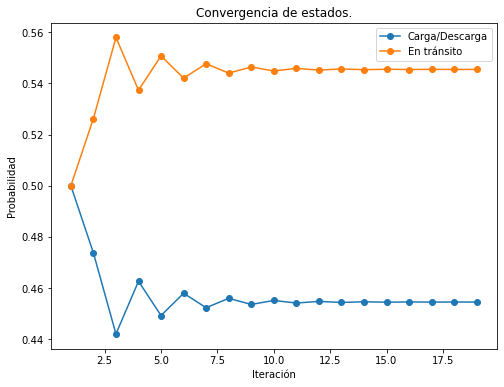

In [56]:
# Cantidad de pasos:
m_tot = 20

# Generación del vector inicial p_0:
p_0 = np.array([0.5, 0.5])

# vectores para guardar estados:
estado_carga = [p_0[0]]
estado_transito = [p_0[1]]

# For loop:
for m in range(2, m_tot):
    
    p_m = calcular_estado_futuro(m, p_0)
    
    # guardamos estados:
    estado_carga.append(p_m[0])
    estado_transito.append(p_m[1])
    
# Plotteamos estados:
plt.subplots(figsize=(8, 6))
plt.plot(range(1, m_tot), estado_carga, marker='o', label='Carga/Descarga')
plt.plot(range(1, m_tot), estado_transito, marker='o', label='En tránsito')
plt.legend()
plt.title('Convergencia de estados.')
plt.xlabel('Iteración')
plt.ylabel('Probabilidad')

## Cálculo de caminos con simulación

In [82]:
# Estados posibles. 0: carga, 1: transito.
estados = [0, 1]

# Cantidad de iteraciones.
h = 10000

# Estado inicial.
estado_actual = 1

# Historia de estados.
historia_estados = [estado_actual]

# Simulación.
for i in range(0, h):
    
    # Probabilidades de salto al próximo estado.
    probas = T[estado_actual, :]
    
    # Cálculo de próximo estado.
    estado_actual = np.random.choice(estados, 1, p=probas)[0]
    
    # Guardado en historia.
    historia_estados.append(estado_actual)
    
print(historia_estados)